In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from torchviz import make_dot

In [2]:
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1]
])
print(sampleData1)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


In [3]:
x = sampleData1[:, 0]
y = sampleData1[:, 1]

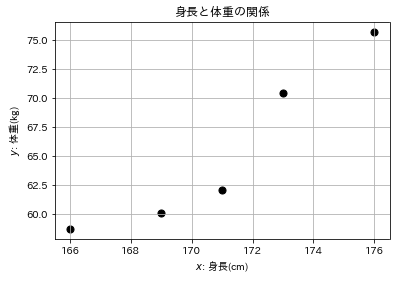

In [4]:
plt.scatter(x, y, c='k', s=50)
plt.xlabel('$x$: 身長(cm)')
plt.ylabel('$y$: 体重(kg)')
plt.title('身長と体重の関係')
plt.grid()
plt.show()

In [5]:
X = x - x.mean()
Y = y - y.mean()

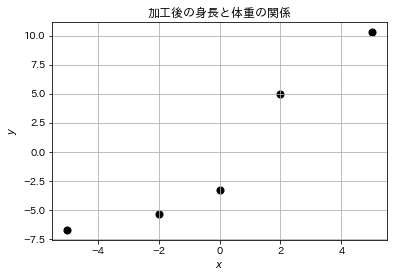

In [6]:
plt.scatter(X, Y, c='k', s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('加工後の身長と体重の関係')
plt.grid()
plt.show()

In [7]:
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [8]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

In [9]:
def pred(X):
    return W * X + B

In [10]:
Yp = pred(X)
print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


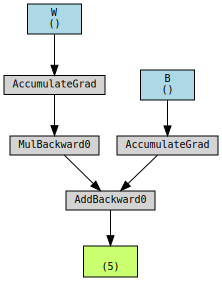

In [11]:
params = {'W': W, 'B': B}
g = make_dot(Yp, params=params)
display(g)

In [12]:
def mse(Yp, Y):
    loss = ((Yp - Y) ** 2).mean()
    return loss

In [13]:
loss = mse(Yp, Y)
print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


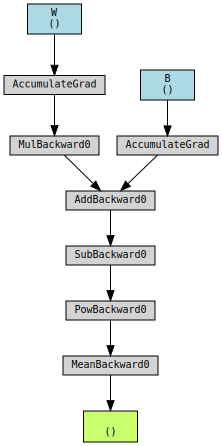

In [14]:
params = {'W': W, 'B': B}
g = make_dot(loss, params=params)
display(g)

In [15]:
loss.backward()

In [16]:
print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


In [17]:
lr = 0.001

In [18]:
W -= lr * W.grad
B -= lr * B.grad

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [19]:
with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad

    W.grad.zero_()
    B.grad.zero_()

In [20]:
print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


In [21]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500
lr = 0.001

history = np.zeros((0, 2))

In [24]:
for epoch in range(num_epochs):
    Yp = pred(X)

    loss = mse(Yp, Y)

    loss.backward()

    with torch.no_grad():
        W -= lr * W.grad
        B -= lr * B.grad

        W.grad.zero_()
        B.grad.zero_()

    if epoch % 10 == 0:
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}, loss = {loss:.4f}')

epoch = 0, loss = 13.3520
epoch = 10, loss = 10.3855
epoch = 20, loss = 8.5173
epoch = 30, loss = 7.3364
epoch = 40, loss = 6.5858
epoch = 50, loss = 6.1047
epoch = 60, loss = 5.7927
epoch = 70, loss = 5.5868
epoch = 80, loss = 5.4476
epoch = 90, loss = 5.3507
epoch = 100, loss = 5.2805
epoch = 110, loss = 5.2275
epoch = 120, loss = 5.1855
epoch = 130, loss = 5.1507
epoch = 140, loss = 5.1208
epoch = 150, loss = 5.0943
epoch = 160, loss = 5.0703
epoch = 170, loss = 5.0480
epoch = 180, loss = 5.0271
epoch = 190, loss = 5.0074
epoch = 200, loss = 4.9887
epoch = 210, loss = 4.9708
epoch = 220, loss = 4.9537
epoch = 230, loss = 4.9373
epoch = 240, loss = 4.9217
epoch = 250, loss = 4.9066
epoch = 260, loss = 4.8922
epoch = 270, loss = 4.8783
epoch = 280, loss = 4.8650
epoch = 290, loss = 4.8522
epoch = 300, loss = 4.8399
epoch = 310, loss = 4.8281
epoch = 320, loss = 4.8167
epoch = 330, loss = 4.8058
epoch = 340, loss = 4.7953
epoch = 350, loss = 4.7853
epoch = 360, loss = 4.7756
epoch = 37

In [27]:
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

print(f'初期状態: 損失: {history[0, 1]:.4f}')
print(f'最終状態: 損失: {history[-1, 1]:.4f}')

W =  1.820683
B =  0.3675114
初期状態: 損失: 13.3520
最終状態: 損失: 4.6796


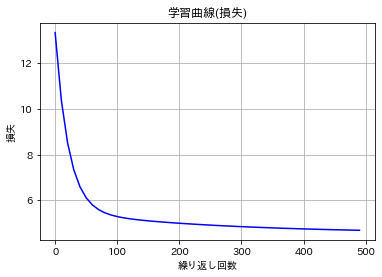

In [28]:
plt.plot(history[:, 0], history[:, 1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.grid()
plt.show()

In [30]:
X_max = X.max()
X_min = X.min()
X_range = np.array((X_min, X_max))
X_range = torch.from_numpy(X_range).float()
print(X_range)

Y_range = pred(X_range)
print(Y_range.data)

tensor([-5.,  5.])
tensor([-8.7359,  9.4709])


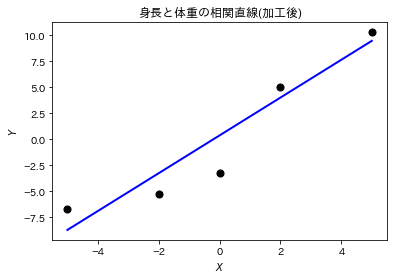

In [31]:
plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.title('身長と体重の相関直線(加工後)')
plt.show()

In [32]:
x_range = X_range + x.mean()
yp_range = Y_range + y.mean()

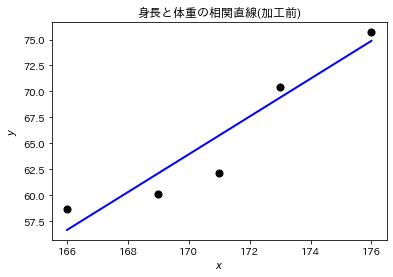

In [33]:
plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_range, yp_range.data, lw=2, c='b')
plt.title('身長と体重の相関直線(加工前)')
plt.show()

In [34]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500
lr = 0.001

import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr)

history = np.zeros((0, 2))

In [35]:
for epoch in range(num_epochs):
    Yp = pred(X)

    loss = mse(Yp, Y)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    if epoch % 10 == 0:
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}, loss = {loss:.4f}')

epoch = 0, loss = 13.3520
epoch = 10, loss = 10.3855
epoch = 20, loss = 8.5173
epoch = 30, loss = 7.3364
epoch = 40, loss = 6.5858
epoch = 50, loss = 6.1047
epoch = 60, loss = 5.7927
epoch = 70, loss = 5.5868
epoch = 80, loss = 5.4476
epoch = 90, loss = 5.3507
epoch = 100, loss = 5.2805
epoch = 110, loss = 5.2275
epoch = 120, loss = 5.1855
epoch = 130, loss = 5.1507
epoch = 140, loss = 5.1208
epoch = 150, loss = 5.0943
epoch = 160, loss = 5.0703
epoch = 170, loss = 5.0480
epoch = 180, loss = 5.0271
epoch = 190, loss = 5.0074
epoch = 200, loss = 4.9887
epoch = 210, loss = 4.9708
epoch = 220, loss = 4.9537
epoch = 230, loss = 4.9373
epoch = 240, loss = 4.9217
epoch = 250, loss = 4.9066
epoch = 260, loss = 4.8922
epoch = 270, loss = 4.8783
epoch = 280, loss = 4.8650
epoch = 290, loss = 4.8522
epoch = 300, loss = 4.8399
epoch = 310, loss = 4.8281
epoch = 320, loss = 4.8167
epoch = 330, loss = 4.8058
epoch = 340, loss = 4.7953
epoch = 350, loss = 4.7853
epoch = 360, loss = 4.7756
epoch = 37

In [36]:
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

print(f'初期状態: 損失: {history[0, 1]:.4f}')
print(f'最終状態: 損失: {history[-1, 1]:.4f}')

W =  1.820683
B =  0.3675114
初期状態: 損失: 13.3520
最終状態: 損失: 4.6796


In [37]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500
lr = 0.001

import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)

history2 = np.zeros((0, 2))

In [38]:
for epoch in range(num_epochs):
    Yp = pred(X)

    loss = mse(Yp, Y)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    if epoch % 10 == 0:
        item = np.array([epoch, loss.item()])
        history2 = np.vstack((history2, item))
        print(f'epoch = {epoch}, loss = {loss:.4f}')

epoch = 0, loss = 13.3520
epoch = 10, loss = 5.7585
epoch = 20, loss = 5.9541
epoch = 30, loss = 5.0276
epoch = 40, loss = 4.8578
epoch = 50, loss = 4.7052
epoch = 60, loss = 4.6327
epoch = 70, loss = 4.5940
epoch = 80, loss = 4.5698
epoch = 90, loss = 4.5574
epoch = 100, loss = 4.5495
epoch = 110, loss = 4.5452
epoch = 120, loss = 4.5426
epoch = 130, loss = 4.5411
epoch = 140, loss = 4.5403
epoch = 150, loss = 4.5398
epoch = 160, loss = 4.5395
epoch = 170, loss = 4.5393
epoch = 180, loss = 4.5392
epoch = 190, loss = 4.5391
epoch = 200, loss = 4.5391
epoch = 210, loss = 4.5391
epoch = 220, loss = 4.5391
epoch = 230, loss = 4.5390
epoch = 240, loss = 4.5390
epoch = 250, loss = 4.5390
epoch = 260, loss = 4.5390
epoch = 270, loss = 4.5390
epoch = 280, loss = 4.5390
epoch = 290, loss = 4.5390
epoch = 300, loss = 4.5390
epoch = 310, loss = 4.5390
epoch = 320, loss = 4.5390
epoch = 330, loss = 4.5390
epoch = 340, loss = 4.5390
epoch = 350, loss = 4.5390
epoch = 360, loss = 4.5390
epoch = 370

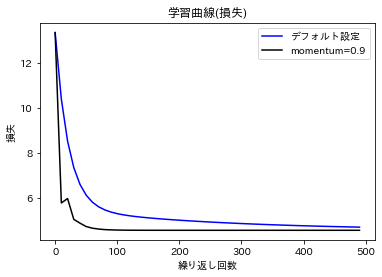

In [39]:
plt.plot(history[:,0], history[:,1], 'b', label='デフォルト設定')
plt.plot(history2[:,0], history2[:,1], 'k', label='momentum=0.9')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.legend()
plt.title('学習曲線(損失)')
plt.show()